In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
np.random.seed(42)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [16]:
def plot_convex_hull(points, hull):
    """
    Plots the convex hull of a set of points in 3D.

    Parameters:
    points (array-like): An array of shape (n, 3).
    """
    points = np.array(points)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:, 0], points[:, 1], points[:, 1], marker='o', label='Points')

    # for simplex in hull.simplices:
    #     simplex = np.append(simplex, simplex[0])  # close the loop
    #     ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 1], 'k-')

    faces = [points[s] for s in hull.simplices]
    poly = Poly3DCollection(faces, alpha=0.3, facecolor='cyan', edgecolor='k')
    ax.add_collection3d(poly)

    ax.set_title('Convex Hull of Points')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    return plt


In [17]:
def hull_extentions(X, t):
    """
    Calculates the directions of the convex hull's extents in 3D.
    """
    phis = np.linspace(0, np.pi, t)
    thetas = np.linspace(0, 1 * np.pi, t)
    directions = []
    for phi in phis:
        for theta in thetas:
            directions.append([
                np.sin(phi) * np.cos(theta),
                np.sin(phi) * np.sin(theta),
                np.cos(phi)
            ])
    directions = np.array(directions)

    extents = {tuple(x): [] for x in X}
    extents_max = {tuple(x): (None, -1) for x in X}

    dot_products = np.dot(X, directions.T)
    for i, direction in enumerate(directions):
        x = X[np.argmax(dot_products[:, i])]
        extents[tuple(x)].append(direction)
        if extents_max[tuple(x)][1] < dot_products[np.argmax(dot_products[:, i]), i]:
            extents_max[tuple(x)] = (direction, dot_products[np.argmax(dot_products[:, i]), i])

    random_directions = np.random.normal(size=(50, 3))
    random_directions /= np.linalg.norm(random_directions, axis=1)[:, np.newaxis]
    random_extents = {tuple(x): [] for x in X}
    random_dot_products = np.dot(X, random_directions.T)
    for i, rd in enumerate(random_directions):
        x = X[np.argmax(random_dot_products[:, i])]
        random_extents[tuple(x)].append(rd)

    return extents, random_extents, extents_max


In [18]:
def plot_convex_hull_extents(points, hull, t):
    """
    Plots the convex hull and its extents in 3D.
    """
    plt = plot_convex_hull(points, hull)
    ax = plt.gcf().axes[0]
    extents, rex, mx = hull_extentions(points, t)

    for point, directions in extents.items():
        for direction in directions:
            ax.quiver(point[0], point[1], point[2],
                      direction[0], direction[1], direction[2],
                      length=1, color='b', alpha=0.02)

    for point, directions in rex.items():
        for direction in directions:
            ax.quiver(point[0], point[1], point[2],
                      direction[0], direction[1], direction[2],
                      length=1, color='r', alpha=0.2)

    for point, _max in mx.items():
        direction = _max[0]
        if direction is None:
            continue
        ax.quiver(point[0], point[1], point[2],
                  direction[0]*1.2, direction[1]*1.2, direction[2]*1.2,
                  length=1, color='g', alpha=0.7)
    return plt


In [19]:
def plot_all(X):
    X = np.array(X)
    hull = ConvexHull(X)
    plt = plot_convex_hull_extents(X, hull, 20)
    plt.show()


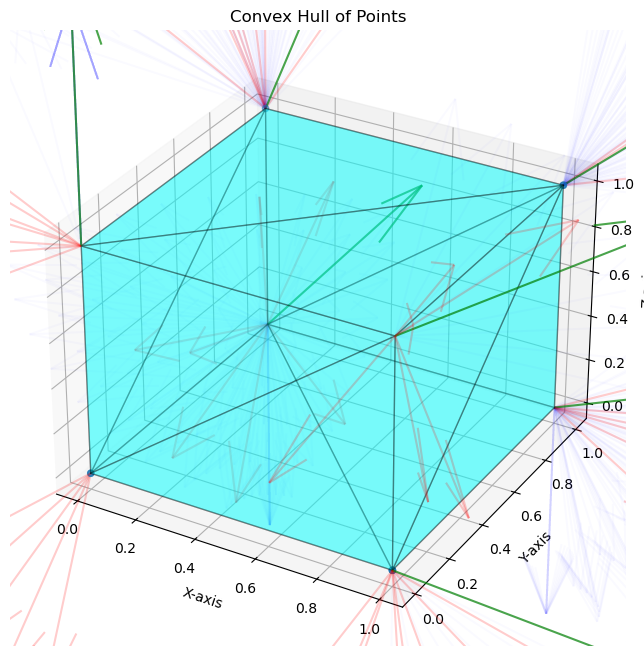

In [20]:
X = [(0,0,0), (1,0,0), (1,1,0), (0,1,0),
     (0,0,1), (1,0,1), (1,1,1), (0,1,1)]
X = np.array(X)
plot_all(X)


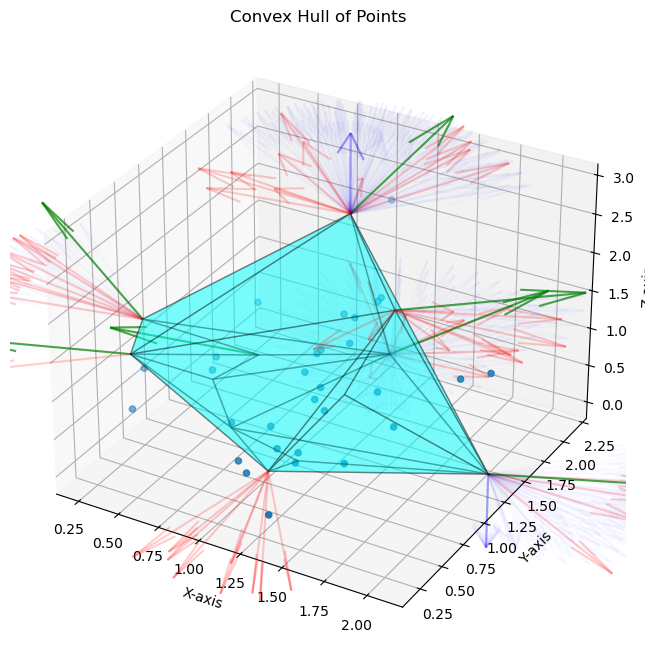

In [21]:
Z = np.random.normal(loc=(1,1,1), scale=0.5, size=(30,3))
plot_all(Z)
